# soraya charkas 99101387

first, we import necessary packages and define the functions which we will use in different parts.

In [1]:
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [97]:
#necessary functions
def Perceptron(N, r, weights, words):
    e = []
    for t in range(N):
        for i in range(words.shape[0]):
            for j in range(words.shape[1]):
                e1 = 0
                y = weights[-1, 0]
                for k in range(words.shape[0]):
                    t_k = 1 if k == i else -1
                    y += words[i, j] @ weights[k]
                    delta_w_k = r * (t_k - y) * words[i, j]
                    weights[k] += delta_w_k
                    e1 += (t_k - y) ** 2
                weights[-1, 0] += r * (t_k - y)
                e.append(e1)
    return weights, e


#    ----------------------------------------------------------------
def Test(weights , word):
    result = np.zeros ((1,7))
    for i in range (weights.shape[0] - 1):
        y = 0
        for j in range (word.shape[0]):
            y = y + word[j]*weights[i,j]
        if y > weights[weights.shape[0]-1,0]:
            result[0 , i] = 1
        else :
            result[0 , i] = -1
    return result
#    ----------------------------------------------------------------
def Binary_Polar(char):
    for i in range (7):
        for j in range (3):
            for k in range (35):
                if (char[i][j][k] == 0):
                    char[i][j][k] = -1
    return char

# Q1

# part 1

first we read the data using pandas library and print the data:

In [15]:

# Load the CSV file into a pandas DataFrame
# Load data from CSV file
data = pd.read_csv('perceptron.csv')

# Shuffle the data randomly
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into training and testing sets
train_size = int(len(data) * 0.75)
train_data = data[:train_size]
test_data = data[train_size:]

# Print the data
print(data)



           x1        x2    y
0    0.845690  1.310171 -1.0
1    1.157702  0.957152 -1.0
2    0.421127  1.315340 -1.0
3   -0.046400 -1.698393  1.0
4   -0.948013 -0.704162  1.0
..        ...       ...  ...
395 -1.047088 -0.965407  1.0
396 -1.275595 -0.921313  1.0
397 -0.950209 -0.698604  1.0
398 -0.595523 -0.554387  1.0
399  1.031912  1.361614 -1.0

[400 rows x 3 columns]


this section is not asked to be shown in the question,but i devided the data sets into learning and training datas with the said rate.(75 % to 25 %)

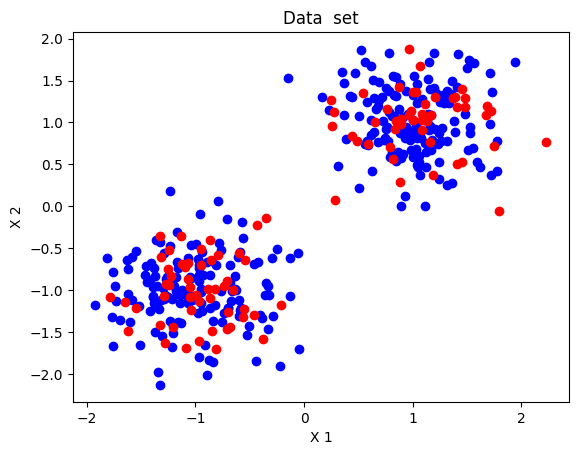

In [16]:
# Create a scatter plot of the training data
plt.scatter(train_data['x1'], train_data['x2'],color = 'blue')
plt.scatter(test_data['x1'], test_data['x2'],color='red')
plt.title('Data  set')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()


now,we can use scatter plot to set different colors for two datasets x1 and x2

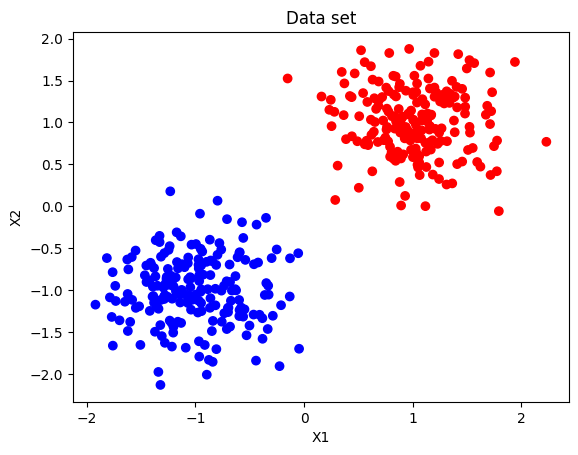

In [43]:
plt.scatter(data['x1'], data['x2'], c=['r' if y == -1 else 'b' for y in data['y']])
plt.title('Data set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# part 2

first we train the neuron using the perceptron algorithm:

In [45]:

# Define the threshold value
threshold = -0.5

# Train the perceptron algorithm
X_train = train_data[['x1', 'x2']].values
y_train = train_data['y'].values
w = np.zeros(X_train.shape[1] + 1)
for epoch in range(100):
    for i in range(X_train.shape[0]):
        x_i = np.concatenate(([1], X_train[i]))
        y_hat_i = np.sign(np.dot(w, x_i))
        if y_hat_i == 0:
            y_hat_i = -1
        if y_hat_i * y_train[i] <= threshold:
            w = w + y_train[i] * x_i

# Test the perceptron algorithm
X_test = test_data[['x1', 'x2']].values
y_test = test_data['y'].values




now, we plot the trained data with the threshold=-0.5

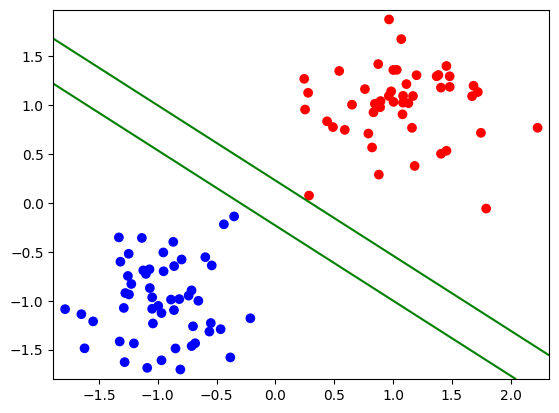

In [53]:
threshold = -0.5
# Plot the test data and decision boundaries
plt.scatter(test_data['x1'], test_data['x2'], c=['r' if y == -1 else 'b' for y in y_test])
x_min, x_max = test_data['x1'].min() - 0.1, test_data['x1'].max() + 0.1
y_min, y_max = test_data['x2'].min() - 0.1, test_data['x2'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.sign(np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w))
Z = Z.reshape(xx.shape)
Z1 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) - threshold
Z1 = Z1.reshape(xx.shape)
plt.contour(xx, yy, Z1, levels=[0], colors='green')
Z2 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) + threshold
Z2 = Z2.reshape(xx.shape)
plt.contour(xx, yy, Z2, levels=[0], colors='green')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# part 3

now we plot the above figure with threshold=-1 and 0

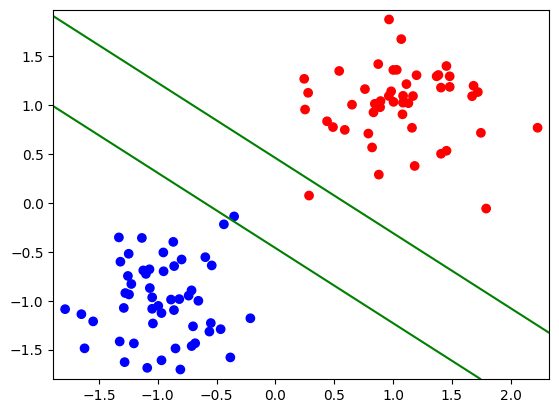

In [51]:
threshold = -1
# Plot the test data and decision boundaries
plt.scatter(test_data['x1'], test_data['x2'], c=['r' if y == -1 else 'b' for y in y_test])
x_min, x_max = test_data['x1'].min() - 0.1, test_data['x1'].max() + 0.1
y_min, y_max = test_data['x2'].min() - 0.1, test_data['x2'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.sign(np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w))
Z = Z.reshape(xx.shape)
Z1 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) - threshold
Z1 = Z1.reshape(xx.shape)
plt.contour(xx, yy, Z1, levels=[0], colors='green')
Z2 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) + threshold
Z2 = Z2.reshape(xx.shape)
plt.contour(xx, yy, Z2, levels=[0], colors='green')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

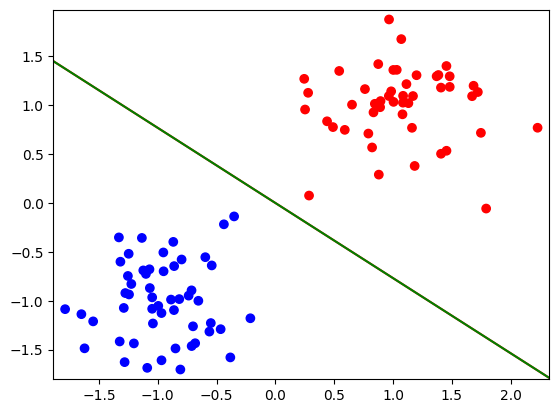

In [50]:
threshold = 0 
# Plot the test data and decision boundaries
plt.scatter(test_data['x1'], test_data['x2'], c=['r' if y == -1 else 'b' for y in y_test])
x_min, x_max = test_data['x1'].min() - 0.1, test_data['x1'].max() + 0.1
y_min, y_max = test_data['x2'].min() - 0.1, test_data['x2'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.sign(np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w))
Z = Z.reshape(xx.shape)
Z1 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) - threshold
Z1 = Z1.reshape(xx.shape)
plt.contour(xx, yy, Z1, levels=[0], colors='r')
Z2 = np.dot(np.concatenate((np.ones((xx.ravel().shape[0], 1)), np.c_[xx.ravel(), yy.ravel()]), axis=1), w) + threshold
Z2 = Z2.reshape(xx.shape)
plt.contour(xx, yy, Z2, levels=[0], colors='green')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

The threshold controls the position of the decision boundary along the axis of the feature space. If the threshold is large, the decision boundary will be closer to the origin, and if the threshold is small, the decision boundary will be farther from the origin. The threshold can be positive or negative, depending on the orientation of the decision boundary.

Adjusting the threshold can have a significant effect on the performance of the perceptron algorithm. If the threshold is too high or too low, the decision boundary may not be able to separate the two classes effectively. For example, if the threshold is too high, the classifier may classify too many instances as negative, resulting in a low recall. On the other hand, if the threshold is too low, the classifier may classify too many instances as positive, resulting in a low precision.

The optimal threshold value depends on the specific problem and the distribution of the data. In practice, the threshold is typically learned along with the weights during training using techniques such as gradient descent or stochastic gradient descent.

# Q2

in this section, we can use the patterns we defined in HW1 ,so we just need to write the perceptron algorithm and training function which i provided in the first cell of this notebook

In [54]:

# Define the training and testing patterns
pattern = np.zeros((7, 3, 35), dtype=float)
patternTest = np.zeros((7, 3, 35), dtype=float)
# Define the patterns for character A
pattern[0,0,:]= [0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1]

pattern[0,1,:]= [0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0]

pattern[0,2,:]= [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0]

# Define the patterns for character X
pattern[1,0,:]= [1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0]

pattern[1,1,:]= [1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0]

pattern[1,2,:]= [1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1]
# Define the patterns for character O
pattern[3,0,:]= [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0]

pattern[3,1,:]= [0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]

pattern[3,2,:]= [0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0]
# Define the patterns for character L
pattern[4,0,:]= [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1]

pattern[4,1,:]= [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1]

pattern[4,2,:]= [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0]

# Define the patterns for character T
pattern[5,0,:]= [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]

pattern[5,1,:]= [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

pattern[5,2,:]= [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]

# Define the patterns for character Z
pattern[6,0,:]= [1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1]

pattern[6,1,:]= [1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0]

pattern[6,2,:]= [1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0]

# Define the patterns for character E

pattern[2,0,:]= [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1]

pattern[2,1,:]= [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0]

pattern[2,2,:]=[1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0]

# Define the testing patterns for character A
patternTest[0,1,:] = [0,0,1,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0]

patternTest[0,0,:] = [0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0]

# Define the testing patterns for character X
patternTest[1,0,:] = [1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0]

patternTest[1,1,:] = [1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0]


# Define the patterns for character O
patternTest[2,0,:] = [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]

patternTest[2,1,:] = [0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0]

# Define the testing patterns for character L
patternTest[3,0,:] =[1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1]

patternTest[3,1,:] = [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1]
    
# Define the patterns for character T
patternTest[4,0,:] = [1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0]

patternTest[4,1,:] = [1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Define the testing patterns for character Z
patternTest[5,0,:] = [1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]

patternTest[5,1,:] = [1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0]

# Define the patterns for character E

patternTest[6,0,:] = [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1]

patternTest[6,1,:] = [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0]


since we use the bipolar coding in perceptron algorithm, we need to use the binary to polar function to convert our patterns to bipolar

In [55]:
pattern = Binary_Polar(pattern)
patternTest = Binary_Polar(patternTest)

# part 1

we implemented the single layer perceptron for this question.the results are as above for both noisy and primary patterns. the results are as below:

In [117]:
weights = np.zeros((8 , 35) , dtype = float)
epoches = 50
weights , history = Perceptron (epoches, 0.01 , weights , pattern)


here, we tested our neuron using the patterns we trained it with :

In [119]:
for i in range(7):
    print("pattern " + str(i))
    print("_____________________________")
    for j in range(3):
        print(" ",Test(weights , pattern[i,j,:]))

pattern 0
_____________________________
  [[ 1. -1.  1. -1.  1. -1.  1.]]
  [[ 1. -1.  1.  1. -1.  1. -1.]]
  [[ 1. -1. -1. -1.  1. -1.  1.]]
pattern 1
_____________________________
  [[-1.  1. -1.  1. -1.  1.  1.]]
  [[-1.  1. -1. -1.  1. -1.  1.]]
  [[-1.  1. -1.  1. -1.  1.  1.]]
pattern 2
_____________________________
  [[-1. -1.  1. -1.  1. -1.  1.]]
  [[-1.  1.  1. -1. -1.  1.  1.]]
  [[-1. -1.  1. -1. -1.  1.  1.]]
pattern 3
_____________________________
  [[-1. -1.  1.  1. -1. -1.  1.]]
  [[-1.  1. -1.  1. -1.  1. -1.]]
  [[-1. -1.  1.  1. -1.  1.  1.]]
pattern 4
_____________________________
  [[-1.  1. -1.  1.  1. -1.  1.]]
  [[-1.  1.  1.  1.  1. -1.  1.]]
  [[-1.  1. -1.  1.  1. -1.  1.]]
pattern 5
_____________________________
  [[-1. -1.  1.  1.  1.  1. -1.]]
  [[-1.  1. -1. -1. -1.  1. -1.]]
  [[-1. -1.  1.  1.  1.  1. -1.]]
pattern 6
_____________________________
  [[-1.  1.  1. -1.  1.  1.  1.]]
  [[-1.  1.  1. -1.  1. -1.  1.]]
  [[-1. -1. -1.  1. -1.  1.  1.]]


as we can see, the learning method was able to find all the patterns, although some error accured, we were able to get a better result than the hebbian learning.now we try it on noisy input

In [101]:
for i in range(7):
    print("pattern " + str(i))
    print("_____________________________")
    for j in range(3):
        print(" ",Test(weights , patternTest[ i,j,:]))

pattern 0
_____________________________
  [[ 1. -1. -1.  1. -1.  1. -1.]]
  [[ 1. -1.  1.  1. -1. -1.  1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 1
_____________________________
  [[-1.  1. -1.  1.  1. -1.  1.]]
  [[-1.  1. -1. -1.  1. -1.  1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 2
_____________________________
  [[-1. -1.  1.  1. -1. -1. -1.]]
  [[-1.  1. -1.  1. -1. -1.  1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 3
_____________________________
  [[-1. -1. -1.  1.  1. -1. -1.]]
  [[-1. -1.  1.  1.  1. -1. -1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 4
_____________________________
  [[-1.  1. -1.  1.  1.  1. -1.]]
  [[-1.  1.  1.  1.  1.  1. -1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 5
_____________________________
  [[-1. -1.  1. -1.  1.  1.  1.]]
  [[-1.  1. -1.  1.  1. -1.  1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]
pattern 6
_____________________________
  [[-1. -1.  1. -1.  1. -1.  1.]]
  [[-1.  1.  1. -1. -1.  1. -1.]]
  [[-1.  1. -1.  1.  1. -1. -1.]]


even with noisy input , we were able to get a pretty good result

# part 2

The perceptron learning algorithm updates the weights for each training instance until convergence or until a maximum number of epochs is reached. The number of epochs determines how many times the algorithm will loop through the entire training dataset during the learning process. 
Increasing the number of epochs in the perceptron learning method may lead to better classification performance, as it allows the algorithm to update the weights more times and potentially converge to a better solution. However, increasing the number of epochs too much can also lead to overfitting, where the model becomes too specific to the training data and performs poorly on unseen data. 
In practice, the optimal number of epochs depends on the complexity of the problem, the size of the dataset, and the learning rate used for weight updates. Typically, the number of epochs is determined by running experiments on a validation set and selecting the number of epochs that gives the best performance on the validation set, so we will see if we increase the epoches to much, we get a poor result.

In [108]:
epoches= 1000
weights , history = Perceptron (epoches, 0.01 , weights , pattern)
for i in range(7):
    print("pattern " + str(i))
    print("_____________________________")
    for j in range(3):
        print(" ",Test(weights , patternTest[ i,j,:]))

pattern 0
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 1
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 2
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 3
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 4
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 5
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 6
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]


as you can see,by increasing the epoches the result got worst.now we increase the learning rate with the number of epoches that we tested at first.

In [110]:
epoches = 50
weights , history = Perceptron (epoches , 0.1 , weights , pattern)
for i in range(7):
    print("pattern " + str(i))
    print("_____________________________")
    for j in range(3):
        print(" ",Test(weights , patternTest[ i,j,:]))

pattern 0
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 1
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 2
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 3
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 4
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 5
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
pattern 6
_____________________________
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]
  [[-1. -1. -1. -1. -1. -1. -1.]]



The learning rate is a hyperparameter in the perceptron algorithm that controls the step size taken in the direction of the gradient during weight updates. Increasing the learning rate can have both positive and negative effects on the performance of the algorithm.
On the one hand, increasing the learning rate can lead to faster convergence and better performance, especially for problems with a high degree of complexity or large datasets. A higher learning rate means that the algorithm takes larger steps in the direction of the gradient, which can help the algorithm reach the optimal solution faster.
On the other hand, increasing the learning rate too much can cause the algorithm to overshoot the optimal solution and potentially diverge. This can result in poor performance and instability in the weights. If the learning rate is too high, the algorithm may miss the optimal weights and bounce back and forth across the minimum, never converging to the optimal solution.
In practice, the optimal learning rate depends on the specific problem and the dataset. A learning rate that is too low may result in slow convergence, while a learning rate that is too high may lead to instability or poor performance. Typically, the learning rate is selected using techniques such as grid search or random search, where a range of learning rates is tried and the one that gives the best performance is selected.

# part 3


The error formula  calculates the sum of the differences between the predicted values and the actual values for all N instances in the dataset. If the predicted values match the actual values perfectly, the error will be zero.however, in practice, it's unlikely that the predicted values will match the actual values exactly, especially in more complex problems or with noisy data. Therefore, the error will typically be non-zero.
In the context of the perceptron algorithm, the goal is to minimize the error by adjusting the weights during the learning process. As the weights are adjusted, the predicted values will become closer to the actual values, and the error will decrease. If the data is linearly separable, the perceptron algorithm is guaranteed to find a solution that separates the data perfectly, which means that the error will eventually converge to zero.
However, if the data is not linearly separable, the perceptron algorithm may not be able to find a perfect solution, and the error will not converge to zero. In this case, the algorithm will continue to update the weights in an attempt to minimize the error, but the error will never reach zero. Instead, the error may converge to some small, non-zero value.
Similarly to the Hebbian learning method, the utilization of orthogonal characters is known to yield improved results. For instance, characters such as "L" or "T" are completely orthogonal, and thus, the highest quality outputs are expected to be attained with these characters.
minimum error for each character :
A = 28% X = 28% O = 33% L = 19%  T = 19%  Z = 42%  E = 38%

# part 4

The Hebbian algorithm is a type of unsupervised learning that uses a simple learning rule based on the correlation between the inputs and the outputs. The weights are updated based on the product of the input and output, so that if the input and output are both active, the weight is increased, and if they are both inactive, the weight is decreased. Hebbian learning is used for unsupervised tasks such as feature extraction, pattern recognition, and clustering.
In contrast, the Perceptron algorithm is a type of supervised learning that uses a linear threshold function to classify input data into one of two categories. The algorithm iteratively adjusts the weights based on the errors between the predicted and actual output values, until a stopping criterion is met. Perceptron learning is used for supervised tasks such as binary classification.
When it comes to increasing the learning rate, both algorithms are affected differently. In the Hebbian algorithm, the learning rate is not typically a hyperparameter that is explicitly set by the user, since the weights are updated based on the product of the inputs and outputs, without any scaling factor. Increasing the learning rate may lead to the weights growing too large, which can result in overfitting and instability.
In the Perceptron algorithm, increasing the learning rate can have a positive effect on the convergence speed, but only up to a certain point. If the learning rate is too high, the algorithm may fail to converge, or oscillate back and forth around the optimal weights. In practice, the learning rate is typically selected using techniques such as grid search or random search to find the optimal value.
As for noisy inputs, both algorithms are affected by noise differently. The Hebbian algorithm is generally more robust to noise, since it is designed to learn from correlated patterns in the input data, which can help to filter out noise. However, if the noise is too high, the Hebbian algorithm may still fail to extract meaningful patterns from the data.
In contrast, the Perceptron algorithm can be more sensitive to noisy inputs, since the linear threshold function is susceptible to misclassifying noisy data points. However, there are modifications to the Perceptron algorithm, such as the use of regularization or the addition of noise during training, which can help to improve its robustness to noise.
comparing our results in this homework with the previous one, we can see that the perceptron has a better result when testing the primary patterns. the accuracy for hebbian learning with binary coding was around 4% ,at the end, when wwe modified our algorithm and used bipolar coding, we got an accuracy rate around 60%,but in perceptron algorithm,we can even have around 90% accuracy chosing the best number of epoches and learning rate.